# top two cells plot the images individually - for subplotting press run all

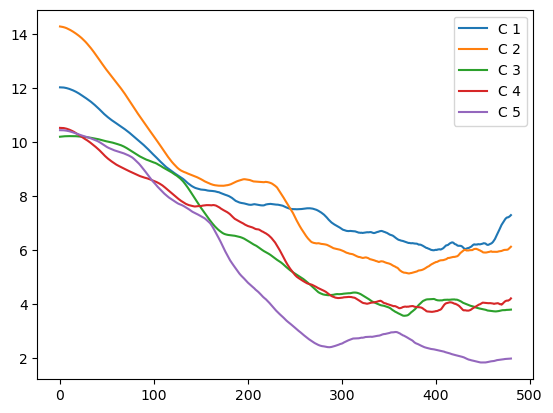

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

arrays = [np.load(f) for f in sorted(os.listdir()) if f.endswith('.npy')]
  
def rolling_average(arr, ROLLING_WINDOW_SIZE):
    np_arr = np.array(arr)
    cumsum = np_arr.cumsum()
    cumsum[ROLLING_WINDOW_SIZE:] -= cumsum[:-ROLLING_WINDOW_SIZE]
    return np.array((cumsum[ROLLING_WINDOW_SIZE - 1:] / ROLLING_WINDOW_SIZE))


fig1 = plt.figure()    
for i, data in enumerate(arrays):
    plt.plot(rolling_average(data,20), label=f'C {i+1}')
    plt.legend()




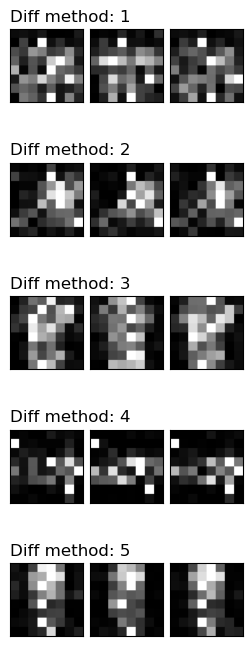

In [2]:
from matplotlib import gridspec
from PIL import Image
import numpy as np

folder_path = os.getcwd()
image_files = sorted([f for f in os.listdir(folder_path) if f.lower().endswith("0.png") or f.lower().endswith("1.png") or f.lower().endswith("2.png")]) #only want 2 images per layer so not crowded
loaded_images = [np.array(Image.open(os.path.join(folder_path, f)).convert("L")) for f in image_files]

'use two lines below to format the image sizes'
fig2 = plt.figure(figsize=(3, 10))
outer = gridspec.GridSpec(6, 3, wspace=0.1, hspace=0.3) #currently expects 18 images

total_images = 18 #amount of images to show
for i, img_array in enumerate(loaded_images[:total_images]):  
    ax = plt.Subplot(fig2, outer[i])
    ax.imshow(img_array, cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
    if i % 3 == 0:
        ax.set_title(f'Diff method: {int((i/3)+1)}', loc='left')
    fig2.add_subplot(ax)





/tmp/ipykernel_2314230/2745416630.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


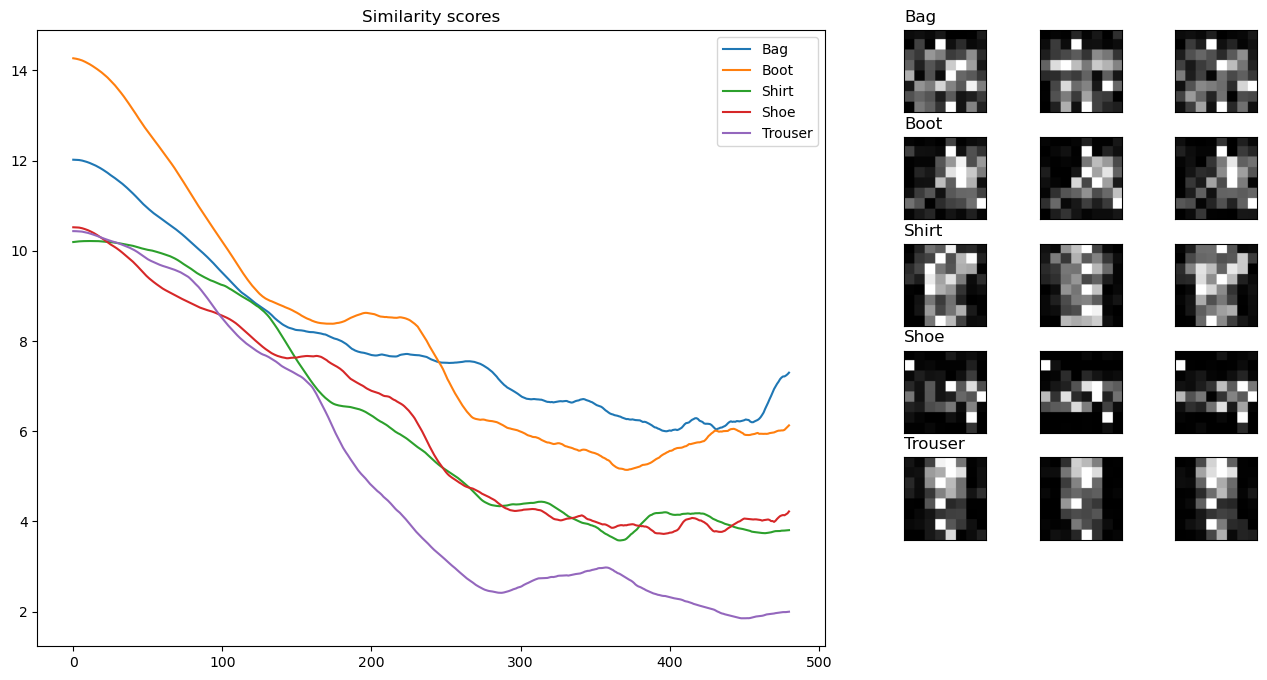

In [ ]:

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib import gridspec

fig = plt.figure(figsize=(16, 8)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1], wspace=0.1)

diff_method = ['Bag', 'Boot', 'Shirt', 'Shoe', 'Trouser']

# Line plot on the left
ax0 = fig.add_subplot(gs[0])
for i, data in enumerate(arrays):
    ax0.plot(rolling_average(data, 20), label=diff_method[i], linewidth=3.5)

ax0.set_xlabel("Iteration", fontsize=30)
ax0.set_ylabel("FID Score", fontsize=30)
ax0.tick_params(axis='both', labelsize=25)
ax0.grid(True, which='major', linestyle='--', linewidth=0.8, alpha=0.7)  
ax0.minorticks_on()                                                   
ax0.tick_params(which='both', direction='in', top=True, right=True)
ax0.xaxis.set_major_locator(MultipleLocator(100))
ax0.xaxis.set_minor_locator(MultipleLocator(50))
ax0.yaxis.set_major_locator(MultipleLocator(2))
ax0.yaxis.set_minor_locator(MultipleLocator(1))
ax0.set_xlim(0, 500)
ax0.set_ylim(0, 16)
ax0.legend(fontsize=25)

# Image grid on the right
diff_method2 = ['Bag', 0, 0, 'Boot', 0, 0, 'Shirt', 0, 0, 'Shoe', 0, 0, 'Trouser', 0, 0]  # filler 0s
gs_right = gridspec.GridSpecFromSubplotSpec(6, 3, subplot_spec=gs[1], wspace=0.1, hspace=1.0)

for i, img_array in enumerate(loaded_images[:18]):
    ax = fig.add_subplot(gs_right[i])
    ax.imshow(img_array, cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
    if i % 3 == 0 and diff_method2[i] != 0:
        ax.set_title(diff_method2[i], loc='left', fontsize=30)



plt.tight_layout()
plt.savefig('fashion_mnist.pdf', format='pdf', bbox_inches='tight')